In [1]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Full_Data_Sentiment_Analysis_LLM_Output_ETF_value_Label.csv")

### Word Cloud Generation with Custom Stopwords Filtering

This script is designed to generate word clouds for each label in the dataset, focusing on the meaningful words that contribute to the analysis. The process involves several key steps:

1. **Text Filtering:** 
   - The `filter_english` function is employed to clean the text, removing any non-English characters. This ensures that the word clouds reflect only standard English words and letters.

2. **Stopwords Removal:** 
   - In addition to the default stopwords provided by the WordCloud library, a custom list of words such as "Google," "Apple," "Facebook," "Amazon," and other common terms is defined. These words are added to the stopwords list to further refine the word clouds by excluding irrelevant or overly common terms that might dilute the insights.

3. **Word Cloud Generation:** 
   - For each unique label in the dataset, the filtered text is used to generate a word cloud. These word clouds are saved as image files and displayed, highlighting the most frequent and significant words within each category.


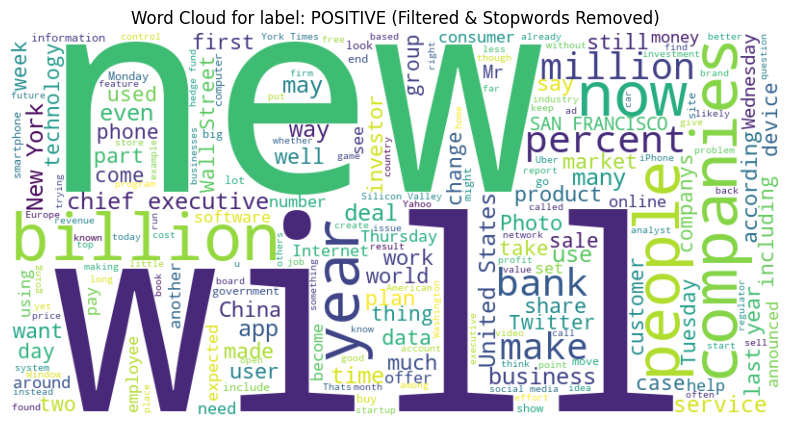

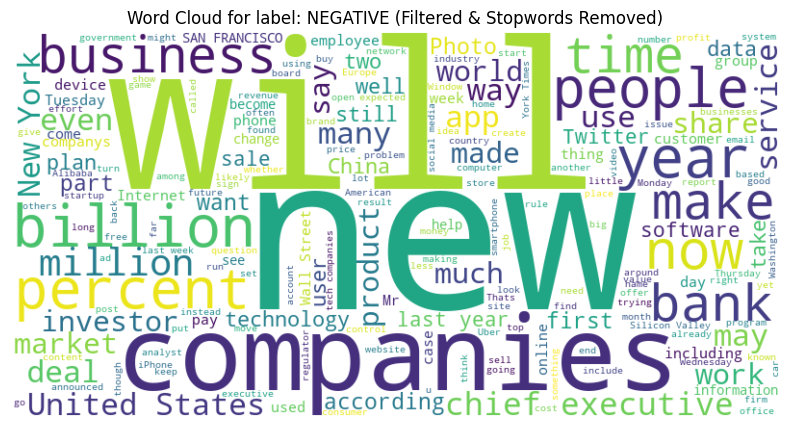

In [4]:
# Below code was built with help from chat GPT

# Function to filter text to only English words and letters
def filter_english(text):
    # Remove any character that is not a letter or space (basic filter)
    return re.sub(r'[^a-zA-Z\s]', '', text)


custom_stopwords = set(["Google", "Apple", "Facebook", "Amazon", "Microsoft", "Company", "said", "one"])
# Combine the existing STOPWORDS with a custom list if needed
stopwords = STOPWORDS.union(custom_stopwords)

# Generate word clouds for each label
labels = df['label'].unique()

# Creating a dictionary to store word clouds for each label
wordclouds = {}

for label in labels:
    # Apply the filter to each article text and remove stopwords
    text = " ".join(df[df['label'] == label]['full_article'].apply(filter_english))
    wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords).generate(text)
    wordclouds[label] = wordcloud

    # Save the wordcloud to a file
    wordcloud.to_file("wordcloud_{}_filtered_stopwords.png".format(label))

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for label: {label} (Filtered & Stopwords Removed)")
    plt.show()
